In [59]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
stock = '^GSPC'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [61]:
price = data['Close']
price

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
                 ...     
2023-05-12    4124.080078
2023-05-15    4136.279785
2023-05-16    4109.899902
2023-05-17    4158.770020
2023-05-18    4198.049805
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

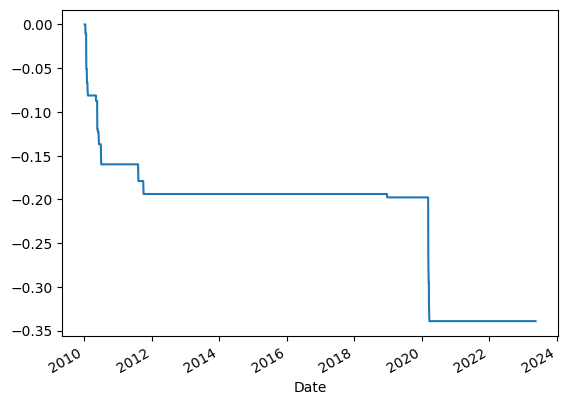

In [62]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [63]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -33.92496000265327 %


In [64]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00311568,  0.00054552, ..., -0.00637768,
        0.01189083,  0.00944505])

In [65]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00311568, 1.0036629 , ..., 3.62748121, 3.67061497,
       3.70528411])

In [66]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 370.5284107425399%


In [67]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.194428
2023-12-31    0.093385
Freq: A-DEC, Name: Close, dtype: float64

In [68]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.028514
2010-03-31    0.058796
2010-04-30    0.014759
2010-05-31   -0.081976
                ...   
2023-01-31    0.061753
2023-02-28   -0.026112
2023-03-31    0.035052
2023-04-30    0.014642
2023-05-31    0.006852
Freq: M, Name: Close, Length: 161, dtype: float64

In [69]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 10.639298032354858%


In [70]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 8.562956095913005


In [71]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.081976
2010-06-30   -0.053882
2010-08-31   -0.047449
2010-11-30   -0.002290
2011-03-31   -0.001047
2011-05-31   -0.013501
2011-06-30   -0.018257
2011-07-31   -0.021474
2011-08-31   -0.056791
2011-09-30   -0.071762
2011-11-30   -0.005059
2012-04-30   -0.007497
2012-05-31   -0.062651
2012-10-31   -0.019789
2013-06-30   -0.014999
2013-08-31   -0.031298
2014-01-31   -0.035583
2014-07-31   -0.015080
2014-09-30   -0.015514
2014-12-31   -0.004189
2015-01-31   -0.031041
2015-03-31   -0.017396
2015-06-30   -0.021012
2015-08-31   -0.062581
2015-09-30   -0.026443
2015-12-31   -0.017530
2016-01-31   -0.050735
2016-02-29   -0.004128
2016-08-31   -0.001219
2016-09-30   -0.001234
2016-10-31   -0.019426
2017-03-31   -0.000389
2018-02-28   -0.038947
2018-03-31   -0.026884
2018-10-31   -0.069403
2018-12-31   -0.091777
2019-05-31   -0.065778
2019-08-31   -0.018092
2020-01-31   -0.001628
2020-02-29   -0.084110
2020-03-31   -0.125119
2020-09-30   -0.039228
2020-10-31   -0.027666
2021-0

In [72]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 12.15953001809002
